<a href="https://colab.research.google.com/github/rvssridatta/DL/blob/main/CVbasics/CVbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
ROOT = "/content"#/car.jpg"
os.chdir(ROOT)

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'car.jpg', 'sample_data']

In [ ]:
img_path='car.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [ ]:
car = mpimg.imread(img_path)

In [ ]:
car.shape

(265, 397, 3)

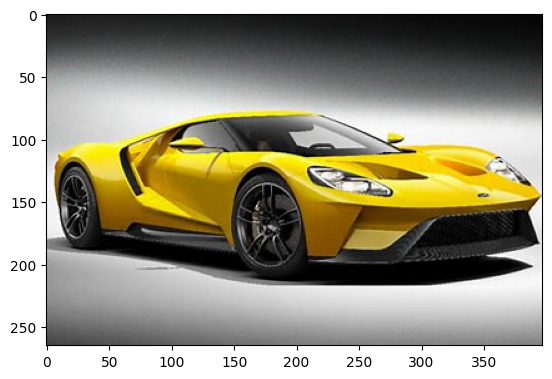

In [ ]:
plt.imshow(car)

In [ ]:
car[0][0]

array([28, 28, 28], dtype=uint8)

In [ ]:
car_v2 = cv2.imread(img_path)

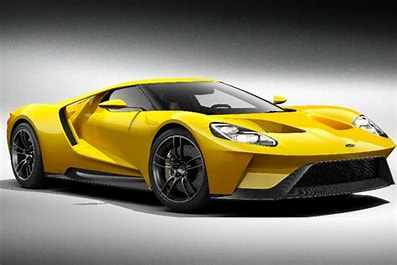

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(car_v2)

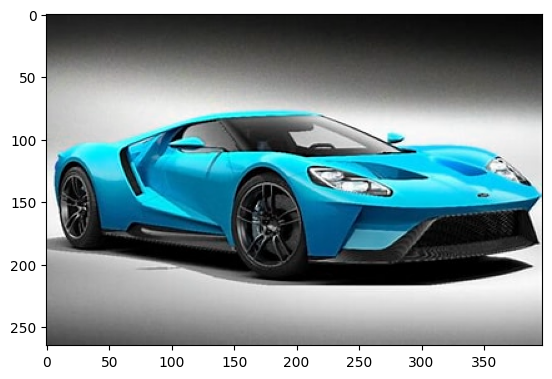

In [ ]:
plt.imshow(car_v2)#cv2 reads bgr and in matplotlib as rgb

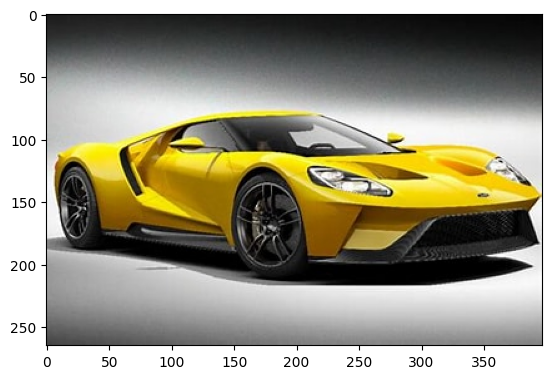

In [ ]:
car_cv2_bgr_rgb = cv2.cvtColor(car_v2, cv2.COLOR_BGR2RGB)
plt.imshow(car_cv2_bgr_rgb)

In [ ]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

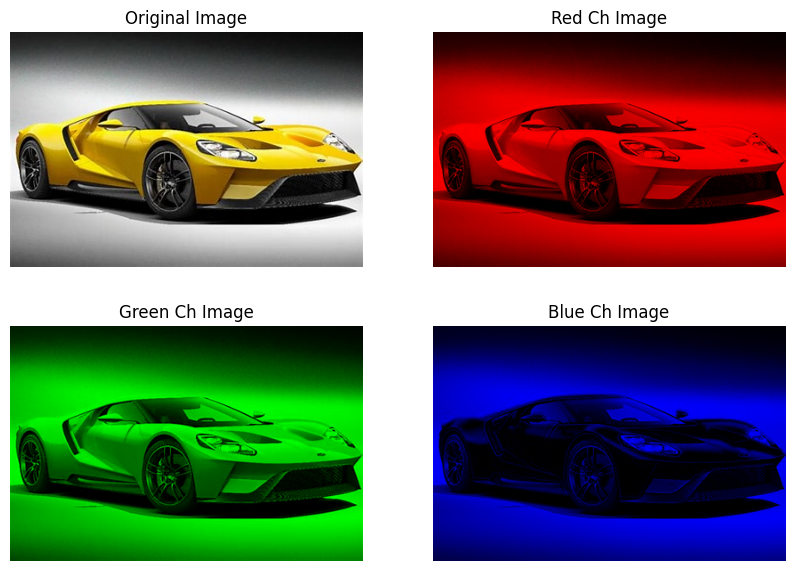

In [ ]:
viusalize_RGB_channel(imgArray=car_v2)

In [ ]:
#filters

sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [ ]:
print("highlighting Horizantal edges:\n", sobel.T)

highlighting Horizantal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [ ]:
def simple_conv(imgFilter=None, picture=None):
  #extract image shape
  p_row,p_col = picture.shape
  k = imgFilter.shape[0]
  temp = list()
  stride = 1

  #resultant image size

  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1
  #take vertically down stride across row by row
  for v_stride in range(final_rows):

    #take horizontal right stride acrros col by col
    for h_stride in range(final_cols):

      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter*target_area_of_pic))
      temp.append(z)

  resultant_image = np.array(temp).reshape(final_rows, final_cols)
  return resultant_image


In [ ]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

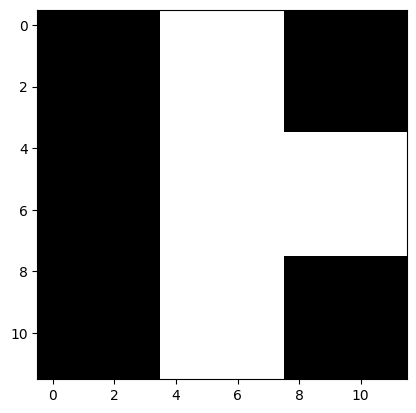

In [ ]:
plt.imshow(example1, cmap="gray")

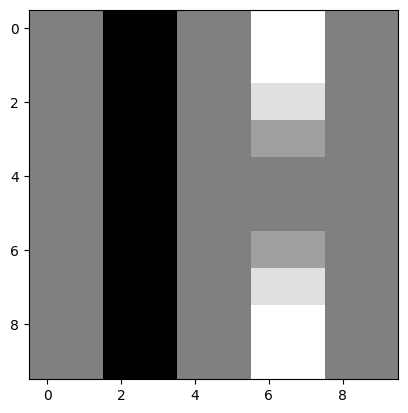

In [ ]:
result = simple_conv(imgFilter=sobel,picture=example1)
plt.imshow(result, cmap="gray")

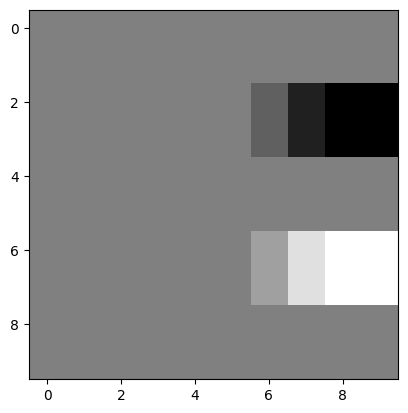

In [ ]:
#horizantol highlighted
result = simple_conv(imgFilter=sobel.T,picture=example1)
plt.imshow(result, cmap="gray")

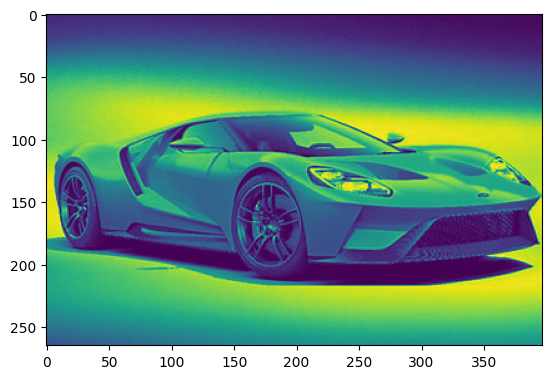

In [ ]:
car_cv2_gray = cv2.cvtColor(car_v2, cv2.COLOR_RGB2GRAY)
plt.imshow(car_cv2_gray)

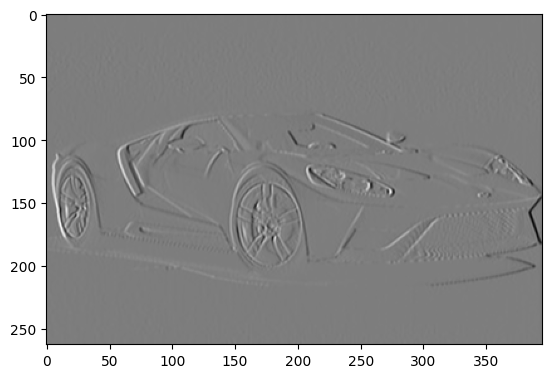

In [ ]:
result = simple_conv(imgFilter=sobel,picture= car_cv2_gray)
plt.imshow(result, cmap="gray")

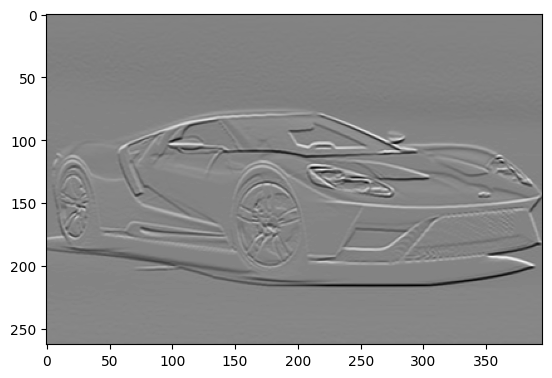

In [ ]:
result = simple_conv(imgFilter=sobel.T,picture= car_cv2_gray)
plt.imshow(result, cmap="gray")

In [ ]:
#if we use some random filter other than sobel

random_f = np.random.randn(3,3)
random_f

array([[-0.16216244, -0.38294616, -0.06732133],
       [ 0.19117226,  1.47203716, -0.51791241],
       [-0.65706182, -0.19936198, -1.31734425]])

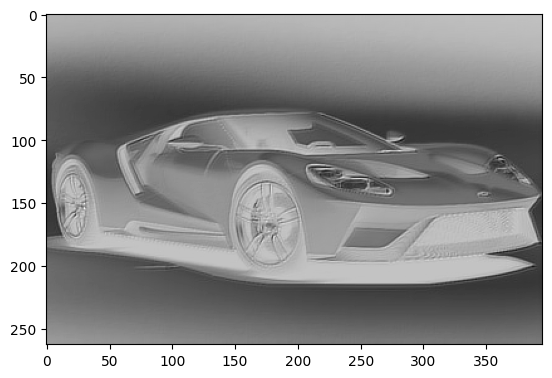

In [ ]:
result = simple_conv(imgFilter=random_f,picture= car_cv2_gray)
plt.imshow(result, cmap="gray")